In this mission, we'll learn another way pandas makes working with data easier. It has many built-in methods and functions for common exploration and analysis tasks. As we learn these, we'll also explore how pandas uses many of the concepts we learned in the NumPy missions, including vectorized operations and boolean indexing.

We'll continue working with a data set from Fortune magazine's Global 500 list 2017, which ranks the top 500 corporations worldwide by revenue. The data set was originally compiled here; however, we modified the original data set to make it more accessible.

In [63]:
import pandas as pd

f500 = pd.read_csv('f500.csv', index_col = 0)

f500.head()

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
company,,,,,,,,,,,,,,,,
Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523
China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893
Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210


In [64]:
f500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Walmart to AutoNation
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rank                      500 non-null    int64  
 1   revenues                  500 non-null    int64  
 2   revenue_change            498 non-null    float64
 3   profits                   499 non-null    float64
 4   assets                    500 non-null    int64  
 5   profit_change             436 non-null    float64
 6   ceo                       500 non-null    object 
 7   industry                  500 non-null    object 
 8   sector                    500 non-null    object 
 9   previous_rank             500 non-null    int64  
 10  country                   500 non-null    object 
 11  hq_location               500 non-null    object 
 12  website                   500 non-null    object 
 13  years_on_global_500_list  500 non-null    int64  
 14  em

### Vectorized operations

Just like with NumPy, we can use any of the standard Python numeric operators with series, including:

- `series_a + series_b` - Addition
- `series_a - series_b` - Subtraction
- `series_a * series_b` - Multiplication (this is unrelated to the multiplications used in linear algebra).
- `series_a / series_b` - Division

Recall that our f500 dataframe includes each company's current and previous year's rank on the Fortune 500 list. Let's use vectorized operations to calculate the changes in rank for each company.

In [65]:
rank_change = f500['previous_rank'] - f500['rank']

#### Series Data Exploration Methods

Like NumPy, pandas supports many descriptive stats methods that can help us answer these questions. Here are a few of the most useful ones (with links to documentation):

- `Series.max()`
- `Series.min()`
- `Series.mean()`
- `Series.median()`
- `Series.mode()`
- `Series.sum()`

Let's use some of these methods to confirm the biggest increase and biggest decrease in rank!

In [66]:
rank_change =  f500["previous_rank"] - f500["rank"]

rank_change_max = rank_change.max()
rank_change_max

226

In [67]:
rank_change_min = rank_change.min()
rank_change_min

-500

#### Series Describe method

In [68]:
assets = f500["assets"]
assets.describe()

count    5.000000e+02
mean     2.436323e+05
std      4.851937e+05
min      3.717000e+03
25%      3.658850e+04
50%      7.326150e+04
75%      1.805640e+05
max      3.473238e+06
Name: assets, dtype: float64

If we use describe() on a column that contains **non-numeric values**, we get some different statistics. Let's look at an example

In [69]:
country = f500["country"]
print(country.describe())

count     500
unique     34
top       USA
freq      132
Name: country, dtype: object


The first statistic, count, is the same as for numeric columns, showing us the number of non-null values. The other three statistics are new:

- `unique`: Number of unique values in the series. In this case, it tells us that there are 34 different countries represented in the Fortune 500.
- `top`: Most common value in the series. The USA is the country that headquarters the most Fortune 500 companies.
- `freq`: Frequency of the most common value. Exactly 132 companies from the Fortune 500 are headquartered in the USA.

Let's use this method to gather more information about the rank and previous_rank series.

In [70]:
rank = f500['rank']
rank_desc = rank.describe()
rank_desc

count    500.000000
mean     250.500000
std      144.481833
min        1.000000
25%      125.750000
50%      250.500000
75%      375.250000
max      500.000000
Name: rank, dtype: float64

In [71]:
prev_rank = f500['previous_rank']
prev_rank_desc = prev_rank.describe()
prev_rank_desc

count    500.000000
mean     222.134000
std      146.941961
min        0.000000
25%       92.750000
50%      219.500000
75%      347.250000
max      500.000000
Name: previous_rank, dtype: float64

### Method chaining

We learned how to use the `Series.value_counts()` method to display the counts of the unique values in a column:

In [72]:
countries = f500["country"]
countries_counts = countries.value_counts()

Rather than assigning the `countries` series to it's own variable, we can actually skip that step and use the method directly on the result of the column selection:

In [73]:
countries_counts = f500["country"].value_counts()

This is called method chaining — a way to combine multiple methods together in a single line. 

In the last mission, we also learned how to use Series.loc[] to select just one item from a series by label. For example, in order to select just the counts for China, we would use the following line of code:

In [74]:
print(f500["country"].value_counts().loc["China"])

109


From here, you'll see method chaining more often in our missions. When writing code, always assess whether method chaining will make your code harder to read. If it does, it's always preferable to break the code into more than one line.

Let's use the `Series.value_counts()` method and `Series.loc` next to confirm the number of 0 values in the previous_rank column.

In [75]:
zero_previous_rank = f500['previous_rank'].value_counts().loc[0]
zero_previous_rank

33

## DataFrame exploration methods

Because series and dataframes are two distinct objects, they have their own unique methods. However, there are many times where both series and dataframe objects have a method of the same name that behaves in similar ways. Below are some examples:

- `Series.max()` and `DataFrame.max()`
- `Series.min()` and `DataFrame.min()`
- `Series.mean()` and `DataFrame.mean()`
- `Series.median()` and `DataFrame.median()`
- `Series.mode()` and `DataFrame.mode()`
- `Series.sum()` and `DataFrame.sum()`

Unlike their series counterparts, **dataframe methods require an axis parameter so we know which axis to calculate across.** While you can use integers to refer to the first and second axis, pandas dataframe methods also accept the strings "index" and "columns" for the axis parameter:


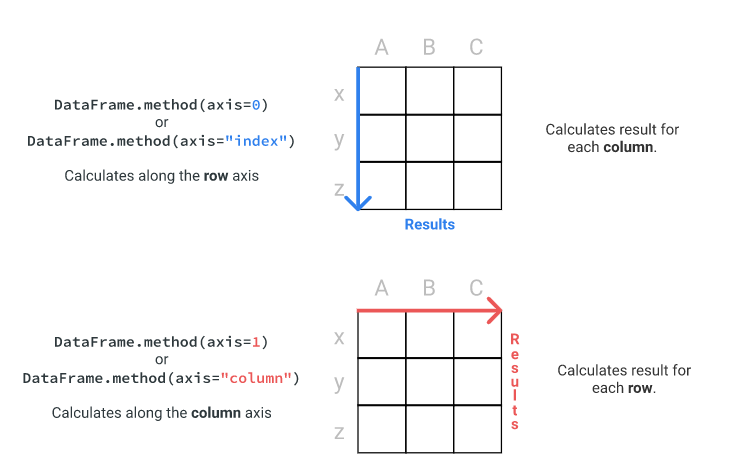

For instance, if we wanted to find the median (middle) value for the `revenues` and `profits` columns, we could use the following code:

In [76]:
medians = f500[["revenues", "profits"]].median(axis=0)
# we could also use .median(axis="index")
print(medians)


revenues    40236.0
profits      1761.6
dtype: float64


In fact, the **default value** for the axis parameter with these methods is `axis=0`. We could have just used the median() method without a parameter to get the same result!

*Use the DataFrame.max() method to find the maximum value for only the numeric columns from f500:*

In [77]:
max_f500 = f500.max(numeric_only = True)
max_f500

rank                            500.0
revenues                     485873.0
revenue_change                  442.3
profits                       45687.0
assets                      3473238.0
profit_change                  8909.5
previous_rank                   500.0
years_on_global_500_list         23.0
employees                   2300000.0
total_stockholder_equity     301893.0
dtype: float64

### DataFrame Describe method

Like series objects, dataframe objects also have a DataFrame.describe() method that we can use to explore the dataframe more quickly. We encourage you to take a look at the documentation using the link in the previous sentence to familiarize yourself with some of the differences between the two methods.

One difference is that we need to manually specify if you want to see the statistics for the non-numeric columns. **By default, DataFrame.describe() will return statistics for only numeric columns. **

If we wanted to get just the object columns, we need to use the include=['O'] parameter:

In [78]:
f500.describe()

,rank,revenues,revenue_change,profits,assets,profit_change,previous_rank,years_on_global_500_list,employees,total_stockholder_equity
count,500.000000,500.000000,498.000000,499.000000,5.000000e+02,436.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,250.500000,55416.358000,4.538353,3055.203206,2.436323e+05,24.152752,222.134000,15.036000,1.339983e+05,30628.076000
std,144.481833,45725.478963,28.549067,5171.981071,4.851937e+05,437.509566,146.941961,7.932752,1.700878e+05,43642.576833
min,1.000000,21609.000000,-67.300000,-13038.000000,3.717000e+03,-793.700000,0.000000,1.000000,3.280000e+02,-59909.000000
25%,125.750000,29003.000000,-5.900000,556.950000,3.658850e+04,-22.775000,92.750000,7.000000,4.293250e+04,7553.750000
50%,250.500000,40236.000000,0.550000,1761.600000,7.326150e+04,-0.350000,219.500000,17.000000,9.291050e+04,15809.500000
75%,375.250000,63926.750000,6.975000,3954.000000,1.805640e+05,17.700000,347.250000,23.000000,1.689172e+05,37828.500000
max,500.000000,485873.000000,442.300000,45687.000000,3.473238e+06,8909.500000,500.000000,23.000000,2.300000e+06,301893.000000


In [79]:
f500.describe(include=['O'])

,ceo,industry,sector,country,hq_location,website
count,500,500,500,500,500,500
unique,500,58,21,34,235,500
top,Inge G. Thulin,Banks: Commercial and Savings,Financials,USA,"Beijing, China",http://www.yangofinance.com
freq,1,51,118,132,56,1


### Assignment with pandas

Let's start by learning assignment, starting with the following example:

In [80]:
top5_rank_revenue = f500[["rank", "revenues"]].head()
print(top5_rank_revenue)

                          rank  revenues
company                                 
Walmart                      1    485873
State Grid                   2    315199
Sinopec Group                3    267518
China National Petroleum     4    262573
Toyota Motor                 5    254694


In [81]:
top5_rank_revenue["revenues"] = 0
print(top5_rank_revenue)

                          rank  revenues
company                                 
Walmart                      1         0
State Grid                   2         0
Sinopec Group                3         0
China National Petroleum     4         0
Toyota Motor                 5         0


Just like in NumPy, the same techniques that we use to select data could be used for assignment. When we selected a whole column by label and used assignment, we assigned the value to every item in that column.


By providing labels for both axes, we can assign them to a single value within our dataframe.

In [82]:
top5_rank_revenue.loc["Sinopec Group", "revenues"] = 999

print(top5_rank_revenue)

                          rank  revenues
company                                 
Walmart                      1         0
State Grid                   2         0
Sinopec Group                3       999
China National Petroleum     4         0
Toyota Motor                 5         0


### Using boolean indexing with pandas objects

While it's helpful to be able to replace specific values when we know the row label ahead of time, this can be cumbersome when we need to replace many values. Instead, we can use boolean indexing to change all rows that meet the same criteria, just like we did with NumPy.

Let's look at two examples of how boolean indexing works in pandas. For our example, we'll work with this dataframe of people and their favorite numbers:

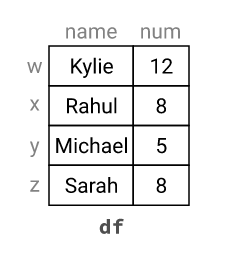

Let's check which people have a favorite number of 8. First, we perform a vectorized boolean operation that produces a boolean series:

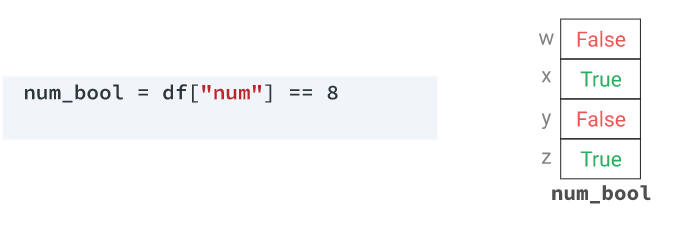

We can use that series to index the whole dataframe, leaving us with the rows that correspond only to people whose favorite number is 8:

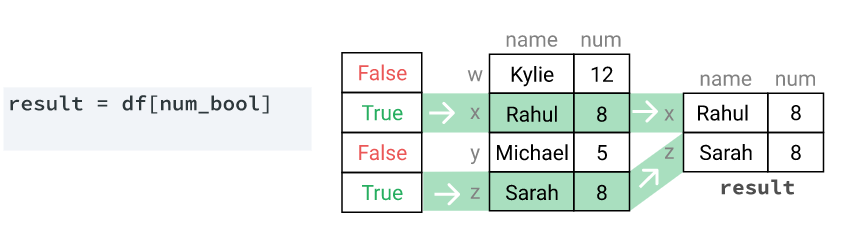


Note that we didn't use loc[]. This is because boolean arrays use the same shortcut as slices to select along the index axis. We can also use the boolean series to index just one column of the dataframe:

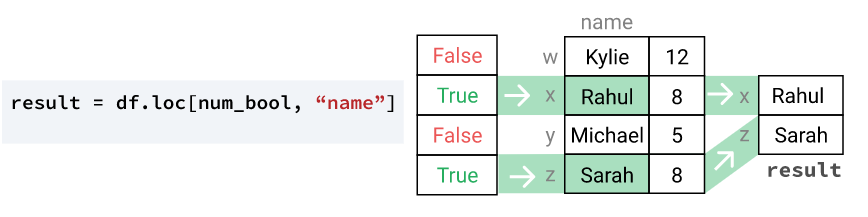

In this case, we used df.loc[] to specify both axes.

Next, let's use boolean indexing to identify companies belonging to the "Motor Vehicles and Parts" industry in our Fortune 500 dataset.

In [83]:
motor_bool = f500['industry'] == 'Motor Vehicles and Parts'

motor_countries = f500.loc[motor_bool, 'country']

### Using boolean arrays to assign values

Let's look at an example of how we combine these two operations together. For our example, we'll change the 'Motor Vehicles & Parts' values in the sector column to 'Motor Vehicles and Parts'– i.e. we will change the ampersand (&) to and.

First, we create a boolean series by comparing the values in the sector column to `'Motor Vehicles & Parts'`


In [84]:
ampersand_bool = f500["sector"] == "Motor Vehicles & Parts"

Next, we use that boolean series and the string `"sector"` to perform the assignment

In [85]:
f500.loc[ampersand_bool,"sector"] = "Motor Vehicles and Parts"

Just like we saw in the NumPy mission earlier in this course, we can remove the intermediate step of creating a boolean series, and combine everything into one line. This is the most common way to write pandas code to perform assignment using boolean arrays:

In [86]:
f500.loc[f500["sector"] == "Motor Vehicles & Parts","sector"] = "Motor Vehicles and Parts"

Now we can follow this pattern to replace the values in the previous_rank column. We'll replace these values with np.nan. Just like in NumPy, np.nan is used in pandas to represent values that can't be represented numerically, most commonly missing values.

In [87]:
f500["previous_rank"].value_counts(dropna=False).head()

0      33
159     1
147     1
148     1
149     1
Name: previous_rank, dtype: int64

In [88]:
import numpy as np 

f500.loc[f500['previous_rank'] == 0, 'previous_rank'] = np.nan

In [90]:
f500['previous_rank'].value_counts(dropna = False).head()

# Now there are NaN's where there were 0's

NaN      33
471.0     1
234.0     1
125.0     1
166.0     1
Name: previous_rank, dtype: int64

### Challenge: Top Performers by Country

In this challenge, we'll calculate a specific statistic or attribute of each of the two most common countries from our f500 dataframe. We've identified the two most common countries using the code below:

In [91]:
top_2_countries = f500["country"].value_counts().head(2)
print(top_2_countries)

USA      132
China    109
Name: country, dtype: int64


#### 1st Challenge:

Create a series, `industry_usa`, containing counts of the two most common values in the industry column for companies headquartered in the USA.

In [94]:
f500[f500['country'] == 'USA']['industry'].value_counts().head(2)

Banks: Commercial and Savings               8
Insurance: Property and Casualty (Stock)    7
Name: industry, dtype: int64

#### 2dn Challenge:

Create a series, `sector_china`, containing counts of the three most common values in the sector column for companies headquartered in the China.

In [95]:
f500[f500['country'] == 'China']['sector'].value_counts().head(3)

Financials     25
Energy         22
Wholesalers     9
Name: sector, dtype: int64